**EJERCICIO 1**




1.	Leerlo como un dataframe (con la librería pandas) y llamarlo df_santander

In [2]:
# Imports necesarios para el análisis de datos
import os
import pandas as pd
from scipy.stats import skew
import seaborn as sns
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt



# Define the relative path to the csv file
csv_path = os.path.join(os.getcwd(), 'data', 'data_santander_red.csv')

# Load the csv file into a pandas dataframe
df_santander = pd.read_csv(csv_path)

# get the relative address
print(os.getcwd())

# show the first 5 rows of the dataframe
df_santander.head()

/Users/jorgebarquero/GitRepos/python/Estudio/Data Science/Análisis Exploratorio/Caso Práctico


,Unnamed: 0,fecha_dato,ncodpers,ind_empleado,pais_residencia,sexo,age,fecha_alta,ind_nuevo,antiguedad,...,ind_hip_fin_ult1,ind_plan_fin_ult1,ind_pres_fin_ult1,ind_reca_fin_ult1,ind_tjcr_fin_ult1,ind_valo_fin_ult1,ind_viv_fin_ult1,ind_nomina_ult1,ind_nom_pens_ult1,ind_recibo_ult1
0,0,2015-01-28,1375586,N,ES,H,35,2015-01-12,0.0,6,...,0,0,0,0,0,0,0,0.0,0.0,0
1,1,2015-01-28,1050611,N,ES,V,23,2012-08-10,0.0,35,...,0,0,0,0,0,0,0,0.0,0.0,0
2,2,2015-01-28,1050612,N,ES,V,23,2012-08-10,0.0,35,...,0,0,0,0,0,0,0,0.0,0.0,0
3,3,2015-01-28,1050613,N,ES,H,22,2012-08-10,0.0,35,...,0,0,0,0,0,0,0,0.0,0.0,0
4,4,2015-01-28,1050614,N,ES,V,23,2012-08-10,0.0,35,...,0,0,0,0,0,0,0,0.0,0.0,0


9 - Datos Missing
- Observar si hay tipos de datos missing y graficarlos


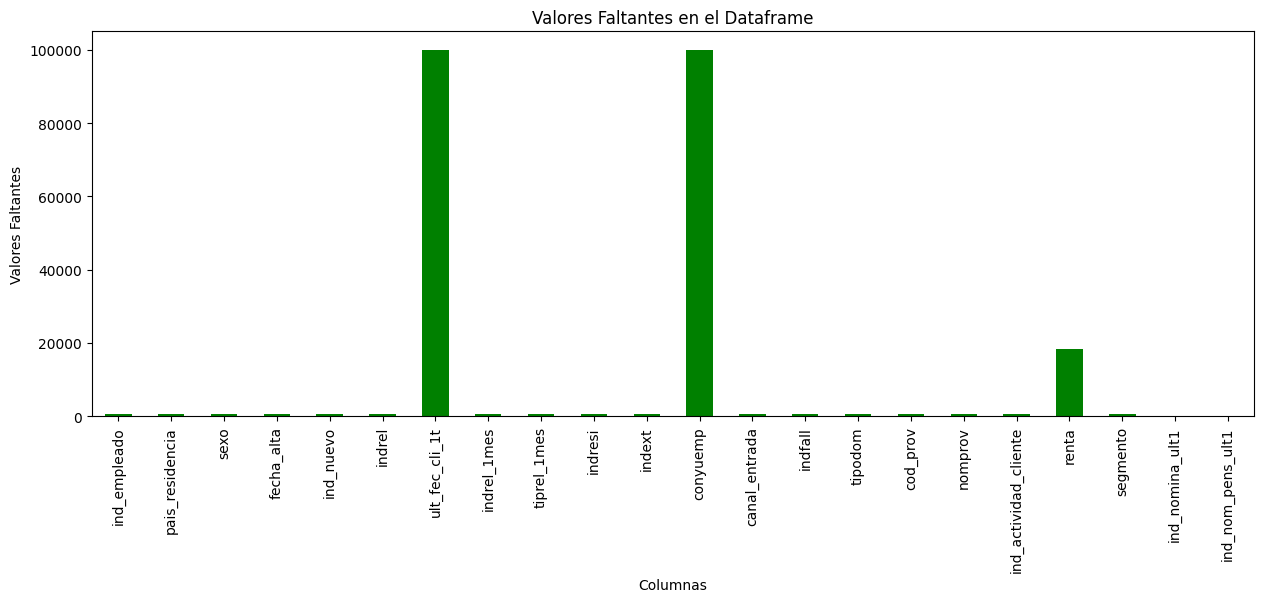

In [3]:
from matplotlib import pyplot as plt

missing_values = df_santander.isnull().sum()
# Plot the missing values
missing_values[missing_values > 0].plot(kind='bar', color='green', figsize=(15, 5))
plt.xlabel('Columnas')
plt.ylabel('Valores Faltantes')
plt.title('Valores Faltantes en el Dataframe')
plt.show()

- Calcular el % que supone para cada variable y proponer varias soluciones para la variable “ind_nomina_ult1”. 

In [4]:
# Calculate the percentage for each variable
percentage = df_santander.count() / len(df_santander) * 100

# Print the percentage for each variable
print(percentage)


Unnamed: 0               100.000
fecha_dato               100.000
ncodpers                 100.000
ind_empleado              99.317
pais_residencia           99.317
sexo                      99.317
age                      100.000
fecha_alta                99.317
ind_nuevo                 99.317
antiguedad               100.000
indrel                    99.317
ult_fec_cli_1t             0.128
indrel_1mes               99.317
tiprel_1mes               99.317
indresi                   99.317
indext                    99.317
conyuemp                   0.000
canal_entrada             99.312
indfall                   99.317
tipodom                   99.317
cod_prov                  99.231
nomprov                   99.231
ind_actividad_cliente     99.317
renta                     81.716
segmento                  99.309
ind_ahor_fin_ult1        100.000
ind_aval_fin_ult1        100.000
ind_cco_fin_ult1         100.000
ind_cder_fin_ult1        100.000
ind_cno_fin_ult1         100.000
ind_ctju_f

- Reemplazar para “age” y “antigüedad” el valor “NA” por np.NaN. 


In [5]:

# Replace the 'NA' values with np.NaN
df_santander['age'] = df_santander['age'].replace(r'NA', np.NaN, regex=True)
# Replace the 'NA' values with np.NaN 
df_santander['antiguedad'] = df_santander['antiguedad'].replace(r'NA', np.NaN, regex=True)


- Si hay alguna variable que esté completamente vacía eliminarla. 


In [6]:
# Drop the columns with all missing values
df_santander.dropna(axis=1, how='all', inplace=True)

- La variable “antigüedad” mayor de 160 años debe ser un error por lo que se debe transformar ese caso a dato no disponible (np.NaN)

In [7]:
df_santander['antiguedad'] = pd.to_numeric(df_santander['antiguedad'], errors='coerce')
df_santander.loc[df_santander['antiguedad'] > 160, 'antiguedad'] = np.NaN

10.	Calcular la media, mediana, desviación estándar, rango, rango intercuartílico, coeficiente de asimetría y la curtosis para la “edad” y “renta” y explicar los resultados. En particular, explicar lo que observe sobre los niños de 4 años. Aplicar las operaciones a nivel de grupo y columna de la media para esas dos variables y saque una conclusión sobre el grupo de las mujeres.

**Media**: representa el valor típico o promedio de un conjunto de datos.

In [8]:
df_santander['age'] = pd.to_numeric(df_santander['age'], errors='coerce')

# Media de edad
media_edad = df_santander['age'].mean(skipna=True)
print("Media de la edad: {:.2f}".format(round(media_edad, 2)))

# Media de renta para toda la población
media_renta = df_santander['renta'].mean(skipna=True)
print("Media de la renta: {:.2f}".format(round(media_renta, 2)))

# Media de renta para niños de 4 años o menores
media_renta_ninos_4 = df_santander[df_santander['age'] <= 4]['renta'].mean(skipna=True)
print("Media de la renta para niños de 4 años: {:.2f}".format(round(media_renta_ninos_4, 2)))

# Media de renta para mujeres 
media_mujeres = df_santander[df_santander['sexo'] == 'V']['renta'].mean(skipna=True)
print("Media de la edad para el grupo de mujeres: {:.2f}".format(round(media_mujeres, 2)))

Media de la edad: 29.34
Media de la renta: 115558.90
Media de la renta para niños de 4 años: 140262.88
Media de la edad para el grupo de mujeres: 118333.03


**Mediana**: se define como el valor que ocupa la posición central en un conjunto de datos ordenados.

In [9]:
# Mediana de edad 
mediana_edad = df_santander['age'].median()
print("Mediana edad: {:.2f}".format(round(mediana_edad, 2)))

# Media de renta
mediana_renta = df_santander['renta'].median()
print("Mediana renta: {:.2f}".format(round(mediana_renta, 2)))

# Media de renta para los niños de 4 años o menores
median_renta_ninos_4 = df_santander[df_santander['age'] <= 4]['renta'].median()
print("Mediana de renta para niños de 4 años: {:.2f}".format(round(median_renta_ninos_4, 2)))

# Media de renta para mujeres
median_mujeres = df_santander[df_santander['sexo'] == 'V']['renta'].median()
print("Mediana de renta para el grupo de mujeres: {:.2f}".format(round(median_mujeres, 2)))


Mediana edad: 25.00
Mediana renta: 89610.21
Mediana de renta para niños de 4 años: 121578.88
Mediana de renta para el grupo de mujeres: 92512.05


**Desviación Estándar**: indica cuánto se alejan los valores individuales de un conjunto de datos respecto a la media aritmética del conjunto.

In [10]:
# Desviación estándar de la edad
std_age = df_santander['age'].std()
print("Desviación estándar de la edad: {:.2f}".format(round(std_age, 2)))

# Desviación estándar de la renta
std_renta = df_santander['renta'].std()
print("Desviación estándar de la renta: {:.2f}".format(round(std_renta, 2)))

# Desviación estándar de la renta para niños de 4 años o menores
std_renta_ninos_4 = df_santander[df_santander['age'] <= 4]['renta'].std()
print("Desviación estándar de la renta para niños de 4 años: {:.2f}".format(round(std_renta_ninos_4, 2)))

# Desviación estándar de la renta para mujeres
std_mujeres = df_santander[df_santander['sexo'] == 'V']['renta'].std()
print("Desviación estándar de la renta para el grupo de mujeres: {:.2f}".format(round(std_mujeres, 2)))

Desviación estándar de la edad: 10.55
Desviación estándar de la renta: 159409.69
Desviación estándar de la renta para niños de 4 años: 69674.87
Desviación estándar de la renta para el grupo de mujeres: 142563.05


**Rango**: proporciona la diferencia entre el valor más alto y el valor más bajo en un conjunto de datos.

In [11]:
age_range = df_santander['age'].max() - df_santander['age'].min()
rent_range = df_santander['renta'].max() - df_santander['renta'].min()

print("Rango de la columna edad: {}".format(age_range))
print("Rango de la columna renta: {}".format(rent_range))

Rango de la columna edad: 102.0
Rango de la columna renta: 24250697.13


**Rango intercuartílico**: describe la extensión de los valores en el rango medio de un conjunto de datos. 

In [12]:
# Edad
Q1_age = df_santander['age'].quantile(0.25)
Q3_age = df_santander['age'].quantile(0.75)
IQR_age = Q3_age - Q1_age

# Renta
Q1_rent = df_santander['renta'].quantile(0.25)
Q3_rent = df_santander['renta'].quantile(0.75)
IQR_rent = Q3_rent - Q1_rent

# Print the values
print("Rango intercuartílico (IQR) de la columna edad: {:.2f}".format(IQR_age))
print("Rango intercuartílico (IQR) de la columna renta: {:.2f}".format(IQR_rent))

Rango intercuartílico (IQR) de la columna edad: 8.00
Rango intercuartílico (IQR) de la columna renta: 70852.98


**Coeficiente de asimetría**

Cuantifica la asimetría de una distribución de datos. Indica si la distribución de los datos está sesgada hacia la izquierda (negativa), hacia la derecha (positiva) o si es simétrica.

In [13]:
skew_age = skew(df_santander['age'].dropna())
skew_rent = skew(df_santander['renta'].dropna())
print("Coeficiente de asimetría de la columna edad: {:.2f}".format(skew_age))
print("Coeficiente de asimetría de la columna renta: {:.2f}".format(skew_rent))

Coeficiente de asimetría de la columna edad: 2.29
Coeficiente de asimetría de la columna renta: 60.62


**Curtosis**

Describe la forma de la distribución de probabilidad de un conjunto de datos. Indica qué tan "picuda" o "aplana" es la distribución en comparación con una distribución normal.

In [14]:
from scipy.stats import kurtosis

age_kurtosis = kurtosis(df_santander['age'].dropna())
rent_kurtosis = kurtosis(df_santander['renta'].dropna())

print("Kurtosis de la columna edad: {:.2f}".format(age_kurtosis))
print("Kurtosis de la columna renta: {:.2f}".format(rent_kurtosis))

Kurtosis de la columna edad: 6.41
Kurtosis de la columna renta: 7426.58


11 - Revise si existe algún outlier. Para ello, calcular los percentiles 0.05 (Q1) y 0.95(Q3) utilizando la función quantile() de Pandas. Luego, calcular el (pseudo)rango intercuartílico (IQR) como la diferencia entre Q3 y Q1. Luego definir los límites inferior y superior para identificar outliers como 1.5 veces el IQR por debajo de Q1 y por encima de Q3. Finalmente, encontrar los outliers al seleccionar los valores que están por debajo del límite inferior o por encima del límite superior.

In [15]:
Q1 = df_santander.quantile(0.25)
Q3 = df_santander.quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df_santander[(df_santander < lower_bound) | (df_santander > upper_bound)]

### TODO: Esto no está funcionando


TypeError: unsupported operand type(s) for -: 'str' and 'str'

12 - 13.	Mediante análisis de correlaciones, identificar si la edad es un factor que permite identificar si una persona va a comprar un producto o no.  

<Axes: >

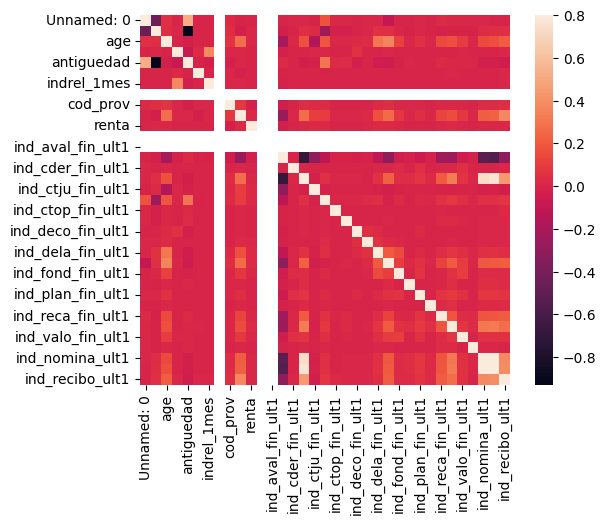

In [ ]:
# Seleccionar las columnas numéricas
df_santander_numeric = df_santander.select_dtypes(include=numerics)

# Se calcula el coeficiente de correlación
corrmat = df_santander_numeric.corr()

# Se grafica la matriz de correlación
sns.heatmap(corrmat, vmax=.8, square=True)

14.	Realizar un análisis cluster sobre las variables de “age” y “renta”. Verifique que para “age” primero debe de convertir la variable a float. Dado que hay missing impute el valor medio para cada variable. Después graficarlo y obtener conclusiones.

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


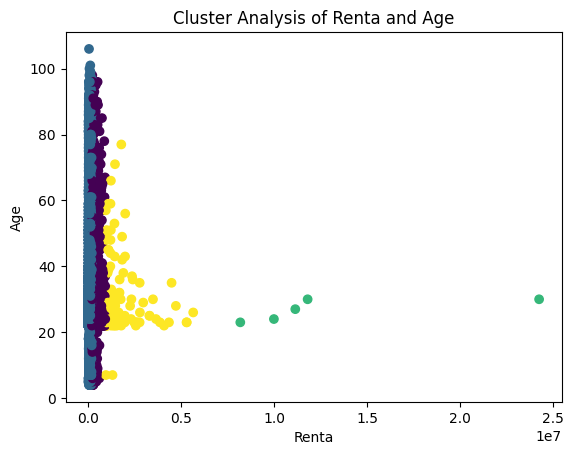

In [ ]:
# Select the columns for clustering
df_cluster = df_santander[['renta', 'age']].copy()

# Convert the 'age' column to float
df_cluster.loc[:, 'age'] = df_cluster['age'].astype(float)

# Fill missing values with the mean
df_cluster.loc[:, 'renta'].fillna(df_cluster['renta'].mean(), inplace=True)
df_cluster.loc[:, 'age'].fillna(df_cluster['age'].mean(), inplace=True)

# Perform K-means clustering
kmeans = KMeans(n_clusters=4)
kmeans.fit(df_cluster)

# Add the cluster labels to the dataframe
df_cluster['cluster'] = kmeans.labels_

# Visualize the clusters
plt.scatter(df_cluster['renta'], df_cluster['age'], c=df_cluster['cluster'])
plt.xlabel('Renta')
plt.ylabel('Age')
plt.title('Cluster Analysis of Renta and Age')
plt.show()


Conclusiones:
 - Existe una gran cantidad de personas con un valor de renta bajo 
 - Hay una mejor distribución de renta para el grupo de edad de 20 a 60 años
 - Existen poca población con valores altos de renta, y todos están entre los 20 y los 40 años 

15 - Cree la variable “numero_productos” como la suma de todos los productos que consume la persona.

A continuación, usando el paquete seaborn y las variables “renta” y “numero_productos” realizar un gráfico de puntos con regresión lineal. ¿Qué se puede apreciar?

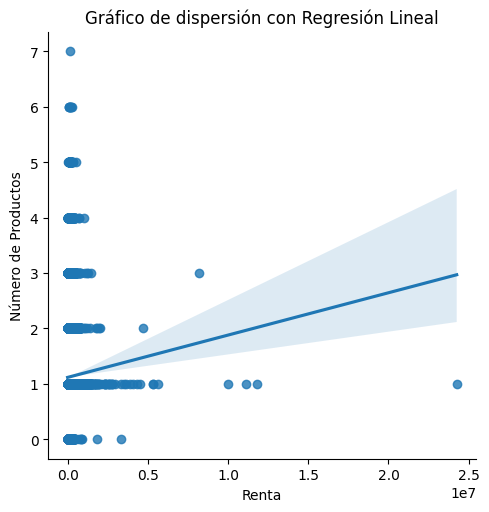

In [ ]:

# Seleccionar columnas de productos
cols = ["ind_tjcr_fin_ult1","ind_reca_fin_ult1","ind_pres_fin_ult1","ind_plan_fin_ult1","ind_hip_fin_ult1","ind_fond_fin_ult1","ind_ecue_fin_ult1","ind_dela_fin_ult1","ind_deme_fin_ult1","ind_deco_fin_ult1","ind_ctpp_fin_ult1","ind_ctop_fin_ult1","ind_ctma_fin_ult1","ind_ctju_fin_ult1","ind_cno_fin_ult1","ind_cder_fin_ult1","ind_cco_fin_ult1"] 

# Se crea una nueva columna con el número de productos
df_santander['numero_productos']=  df_santander[cols].sum(axis=1) 

sns.lmplot(x='renta', y='numero_productos', data=df_santander)
plt.xlabel('Renta')
plt.ylabel('Número de Productos')
plt.title('Gráfico de dispersión con Regresión Lineal')
plt.show()


16.	Usando seaborn y las variables “renta” y “antiguedad” realizar un gráfico de dispersión apoyándose en alguna variable categórica (por ejemplo hue=”nomprov”). Después haga lo mismo tomando logaritmos para la renta e interprete los resultados.

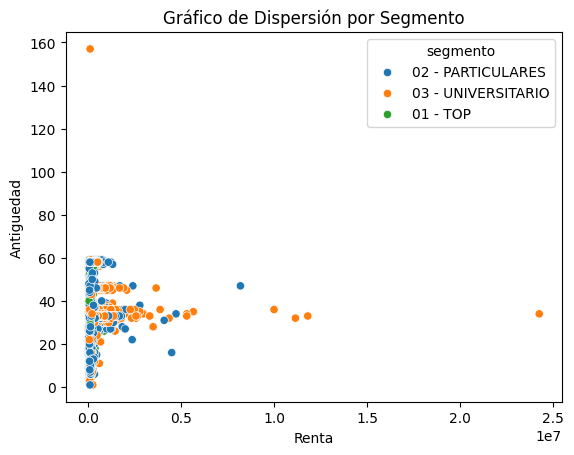

In [16]:
sns.scatterplot(x='renta', y='antiguedad', hue='segmento', data=df_santander)
plt.xlabel('Renta')
plt.ylabel('Antiguedad')
plt.title('Gráfico de Dispersión por Segmento')
plt.show()

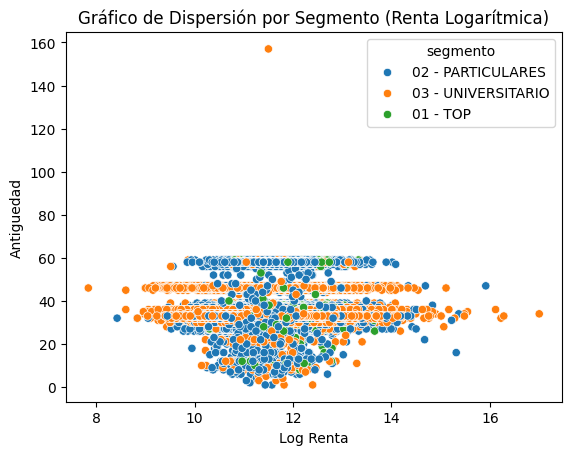

In [18]:
sns.scatterplot(x=np.log(df_santander['renta']), y='antiguedad', hue='segmento', data=df_santander)
plt.xlabel('Log Renta')
plt.ylabel('Antiguedad')
plt.title('Gráfico de Dispersión por Segmento (Renta Logarítmica)')
plt.show()

17.	Calcular el intervalo de confianza para el promedio de renta al 95%. Decida si usa una Normal o una T-Student.

In [20]:


# Define the sample data
sample_data = df_santander['renta']

# Calculate the sample mean and standard deviation
sample_mean = sample_data.mean()
sample_std = sample_data.std()

# Calculate the t-value for a 95% confidence level
t_value = skew.t.ppf(0.975, df=len(sample_data)-1)

# Calculate the margin of error
margin_of_error = t_value * (sample_std / (len(sample_data) ** 0.5))

# Calculate the confidence interval
confidence_interval = (sample_mean - margin_of_error, sample_mean + margin_of_error)

# Print the confidence interval
print("Confidence Interval for Average Income at 95%: ({:.2f}, {:.2f})".format(confidence_interval[0], confidence_interval[1]))


AttributeError: 'function' object has no attribute 't'